In [137]:
import pandas as pd 

from mappings import qualified_subjects
from functions import count_groups, session_counts_by_group, box_plot, line_plot, one_way_anova, tukey_posthoc, predict_visit2_mmse

In [138]:
# Load demographic data
demographic_data = pd.read_csv('oasis2_longitudinal_demographics.csv')

In [139]:
# Filter df to only keep qualified subjects
qualified_demographic_data = demographic_data[demographic_data["Subject ID"].isin(qualified_subjects)]

In [140]:
qualified_demographic_data[qualified_demographic_data["MRI ID"]=="OAS2_0027_MR4"]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
50,OAS2_0027,OAS2_0027_MR4,Nondemented,4,1779,F,R,74,12,3.0,30.0,0.0,1353,0.772,1.297


In [141]:
# Count how many participants are demented, nondemented or converted
count_groups(qualified_demographic_data)

Group
Nondemented    19
Demented       10
Converted       4
Name: count, dtype: int64

In [150]:
# Count how many sessions by group
# I have corrected the function to also show that there is also a converted participant that did 4 sessions
# For some reason it is not importing the new function, probably need to restart the kernel
session_counts_by_group(qualified_demographic_data)

,Group,n_sessions,count
0,Converted,3,4
1,Demented,3,8
2,Demented,4,1
3,Demented,5,1
4,Nondemented,3,12
5,Nondemented,4,5
6,Nondemented,5,2


### Evaluate Mini-Mental State Examination (MMSE) Scores

The Mini-Mental State Examination (MMSE) assesses cognitive function, where **higher scores indicate better cognitive health**.

- **Normal cognition:** 24 – 30  
- **Mild cognitive impairment (CI):** 18 – 23  
- **Severe cognitive impairment:** 0 – 17  

These score ranges help classify the severity of cognitive impairment.

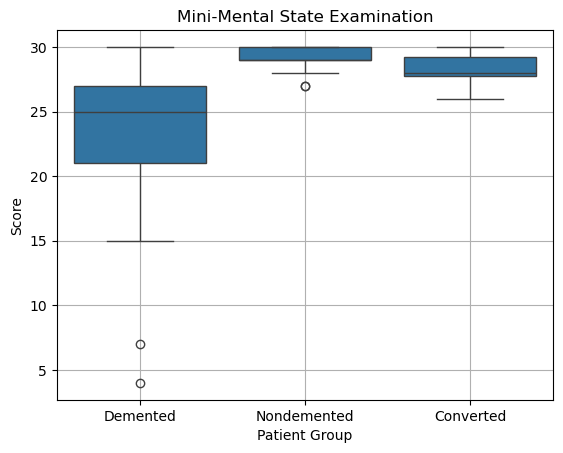

F-statistic: 39.248, p-value: 0.0000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
Converted    Demented  -5.4242   0.0 -8.1576 -2.6908   True
Converted Nondemented   0.9697 0.638  -1.575  3.5143  False
 Demented Nondemented   6.3939   0.0  4.6652  8.1227   True
-----------------------------------------------------------


In [143]:
box_plot(qualified_demographic_data, "MMSE", "Group", "Mini-Mental State Examination", "Patient Group", "Score")

# One-way Anova
f_stat, p_val = one_way_anova(qualified_demographic_data, "MMSE")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    # Tukey Post-Hoc
    result = tukey_posthoc(qualified_demographic_data, value_col="MMSE", group_col="Group")
    print(result)

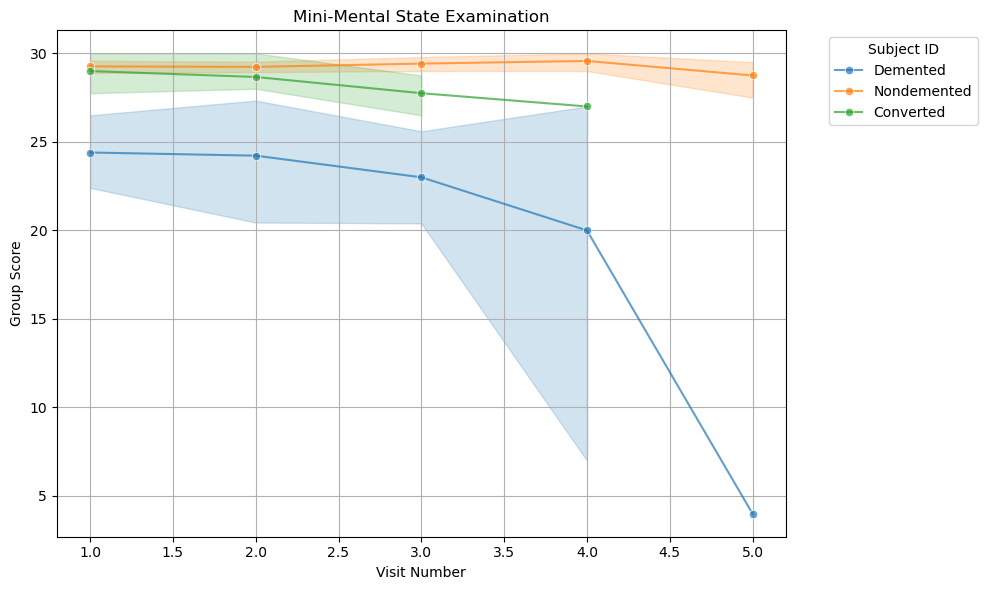

In [144]:
# Look at data across sessions for each patient group across visits
line_plot(qualified_demographic_data, "MMSE", "Group", "Mini-Mental State Examination")

### Clinical Dementia Rating (CDR)

The Clinical Dementia Rating (CDR) is a scale used to quantify the severity of dementia:

- **0** = No dementia  
- **0.5** = Very mild dementia  
- **1** = Mild dementia  
- **2** = Moderate dementia  
- **3** = Severe dementia  

This rating helps assess and track the progression of dementia symptoms.

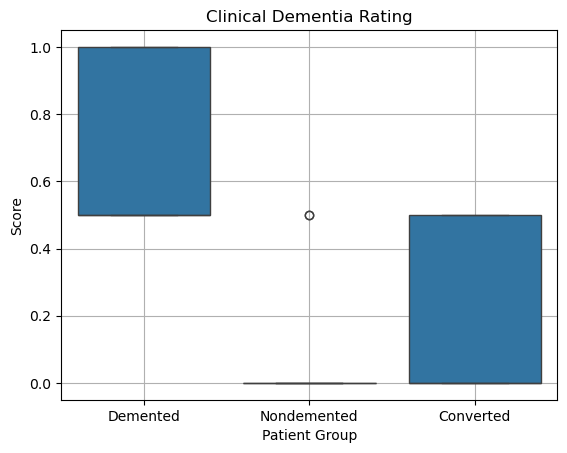

F-statistic: 173.679, p-value: 0.0000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Converted    Demented   0.4886    0.0  0.3511  0.6262   True
Converted Nondemented  -0.1932 0.0015 -0.3212 -0.0651   True
 Demented Nondemented  -0.6818    0.0 -0.7688 -0.5948   True
------------------------------------------------------------


In [145]:
box_plot(qualified_demographic_data, "CDR", "Group", "Clinical Dementia Rating", "Patient Group", "Score")

# One-way ANOVA
f_stat, p_val = one_way_anova(qualified_demographic_data, "CDR")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    # Tukey Post-Hoc
    result = tukey_posthoc(qualified_demographic_data, value_col="CDR", group_col="Group")
    print(result)

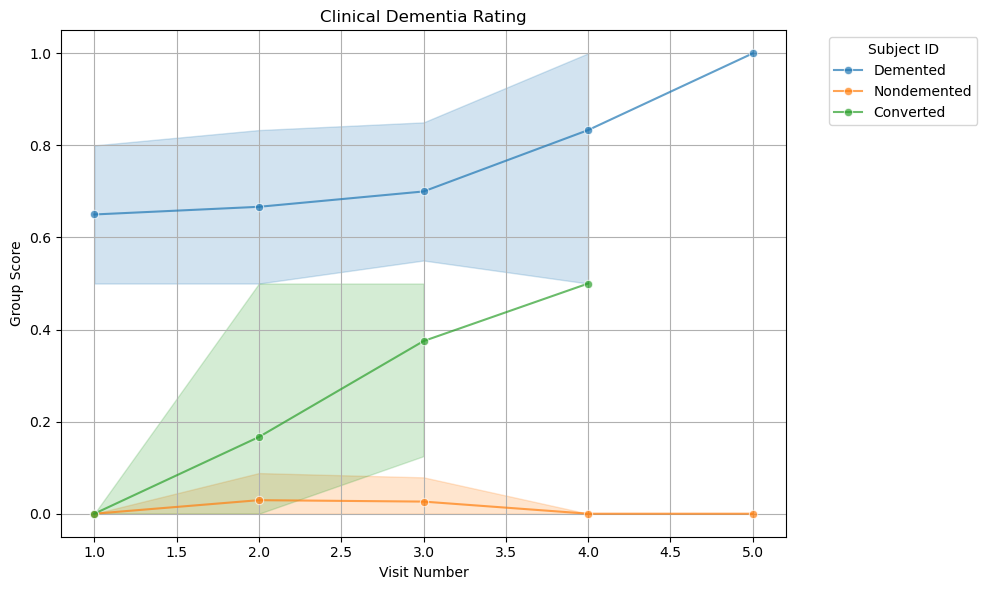

In [146]:
# Look at data across sessions for each patient group across visits
line_plot(qualified_demographic_data, "CDR", "Group", "Clinical Dementia Rating")

### Predicion Model Attempt

Trying to predict MMSE at the second visit from MMSE, CDR, eTIV and nWBV at the first visit.

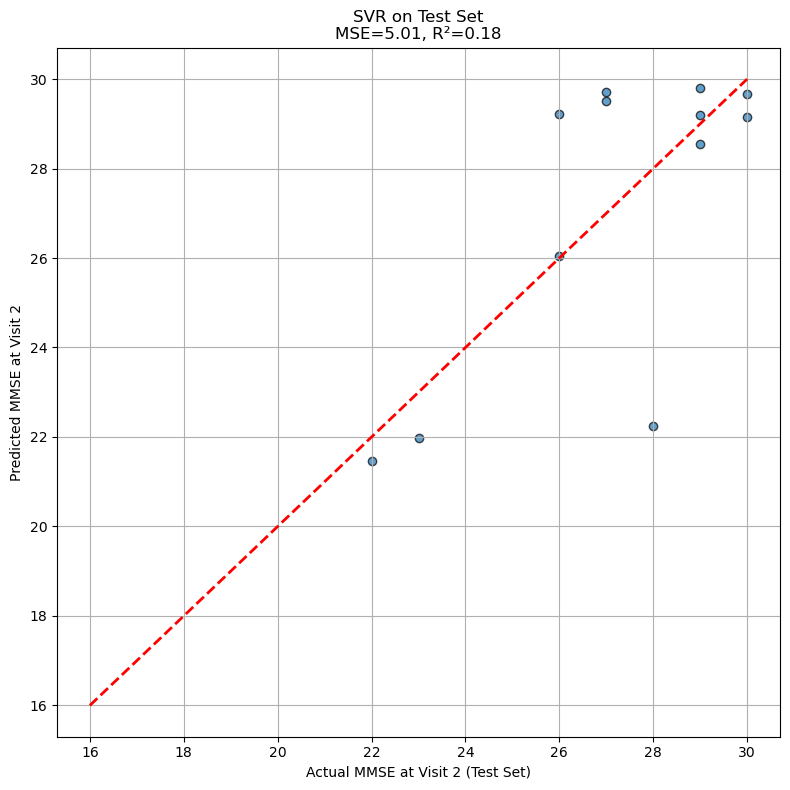

{'train_mse': 0.5224887900025568, 'train_r2': 0.949736826614956, 'test_mse': 5.01107508180553, 'test_r2': 0.1837162762669724}


In [147]:
svr_model, scaler, data_used, performance = predict_visit2_mmse(
    demographic_data,
    features_visit1=["MMSE", "CDR", "eTIV", "nWBV"],
    target_visit2="MMSE",
    kernel='rbf',
    C=10.0,
    epsilon=0.2
)

print(performance)


Trying to predict CDR at the second visit from MMSE, CDR, eTIV and nWBV at the first visit.

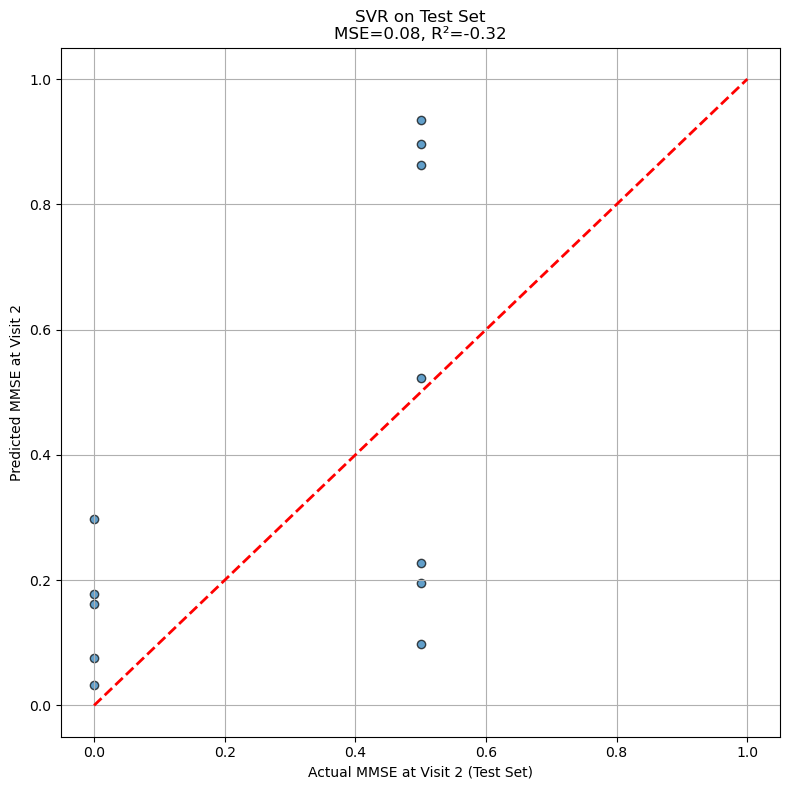

{'train_mse': 0.03269744993428563, 'train_r2': 0.7439859239187848, 'test_mse': 0.08005311767680413, 'test_r2': -0.3174455937668339}


In [148]:
svr_model, scaler, data_used, performance = predict_visit2_mmse(
    demographic_data,
    features_visit1=["MMSE", "CDR", "eTIV", "nWBV"],
    target_visit2="CDR",
    kernel='rbf',
    C=10.0,
    epsilon=0.2
)

print(performance)